# DataCamp (Python)

##    Linear Classifiers in Python              


In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Linear Classifiers in Python/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from sklearn import svm

In [3]:
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import LinearSVC, SVC

from sklearn.linear_model import SGDClassifier

##    CHAPTER 1  - Applying logistic regression and SVM



#### Exercício 1 - scikit-learn refresher

In [4]:
%%script false
#vídeo

import sklearn.datasets

newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
X, y = newsgroups.data, newsgroups.target

# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)

y_pred = knn.predict(X)

print(knn.score(X,y))

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

knn.fit(X_train, y_train)

print(knn.score(X_test, y_test))

Couldn't find program: 'false'


Exercício 2

In [5]:
%%script false

# Large Movie Review Dataset
# data (80MB):    http://ai.stanford.edu/~amaas/data/sentiment/   
# This is a dataset for binary sentiment classification 

from sklearn.neighbors import KNeighborsClassifier

# Create and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the test features, print the results
pred = knn.predict(X_test[0])
print("Prediction for test example 0:", pred)

Couldn't find program: 'false'


Exercício 3

In [6]:
%%script false
# Comparing models

# Compare k nearest neighbors classifiers with k=1 and k=5 

# k=1
knn_1 = KNeighborsClassifier(n_neighbors=1)

knn_1.fit(X_train, y_train)

knn_1.score(X_test, y_test)  # 0.9888888888888889

###########################################################   

# k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(X_train, y_train)

knn_5.score(X_test, y_test)  # 0.9933333333333333

###########################################################   

# Answer: k=5


Couldn't find program: 'false'


Exercício 4

In [7]:
# Overfitting

# Which of the following situations looks like an example of overfitting?

# Training accuracy 50%, testing accuracy 50%.
# Training accuracy 95%, testing accuracy 95%.
# Training accuracy 95%, testing accuracy 50%.  (this looks overfitting)
# Training accuracy 50%, testing accuracy 95%.

#### Exercício 5-- Applying logistic regression and SVM

In [8]:
#vídeo

# Using LogisticRegression

import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.keys()

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
lr.fit(wine.data, wine.target)

print("Logistic regression score: {}".format(lr.score(wine.data, wine.target)))        # mean accuracy 
print("Logistic regression predict probabilities {}".format(lr.predict_proba(wine.data[:1])))  # 99% de prob


# LinearSVC works the same way:   ---- Linear support classifier 
import sklearn.datasets
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=10000)
svm.fit(wine.data, wine.target)
print("\nLinear SVC score: {}".format(svm.score(wine.data, wine.target)))    # mean accuracy 


# Using SVC  --- fits a non-linear by default
from sklearn.svm import SVC

svm = SVC(gamma='scale', max_iter=10000)        # default hyperparameters   C (default=1.0) ; gamma : (default=’auto’)
svm.fit(wine.data, wine.target)
print("SVM score: {}".format(svm.score(wine.data, wine.target)))    # mean accuracy 


# Underfitting: model is too simple, low training accuracy
# Overfitting: model is too complex, low test accuracy

# depois vamos ver as implicações de ser linear ou não linear

Logistic regression score: 0.9943820224719101
Logistic regression predict probabilities [[9.99802290e-01 2.55220157e-05 1.72187746e-04]]

Linear SVC score: 0.9550561797752809
SVM score: 0.7808988764044944


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Exercício 6

In [9]:
# Running LogisticRegression and SVC

from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Apply logistic regression and print scores
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)

lr.fit(X_train, y_train)

print("Linear Regression score with the training set:", lr.score(X_train, y_train))
print("Linear Regression score with the test set:", lr.score(X_test, y_test))


# Apply SVM - using SVC - and print scores
from sklearn.svm import SVC

svm = SVC(gamma='scale', max_iter=10000)

svm.fit(X_train, y_train)

print("\nSVC score with the training set:", svm.score(X_train, y_train))
print("SVC score with the test set:", svm.score(X_test, y_test))

# Later in the course we'll look at the similarities and differences of logistic regression vs. SVMs

Linear Regression score with the training set: 1.0
Linear Regression score with the test set: 0.9622222222222222

SVC score with the training set: 1.0
SVC score with the test set: 0.9888888888888889


Exercício 7

In [10]:
%%script false
# Sentiment analysis for movie reviews

#  logistic regression on a subset of the Large Movie Review Dataset.
# http://ai.stanford.edu/~amaas/data/sentiment/

# The variables X and y are already loaded into the environment. X contains features based on the number of times 
# words appear in the movie reviews, and y contains labels for whether the review sentiment is positive (+1) or negative
# (-1).

# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review 1:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I will never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review 2:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])


<script.py> output:
    Review 1: 'LOVED IT! This movie was amazing. Top 10 this year.''
    Probability of positive review: 0.8079007873616059
        
    Review 2: 'Total junk! I will never watch a film by that director again, no matter how good the reviews.''
    Probability of positive review: 0.5855117402793947


# The second probability would have been even lower, but the word "good" trips it up a bit, since that's considered
# a "positive" word


Couldn't find program: 'false'


#### Exercício 8 - Linear classifiers

In [11]:
#vídeo

# 1) Linear decision boundaries

# 2) Definitions / Vocabulary:

# classification:     learning to predict categories
# decision boundary:  the surface separating different predicted classes
# linear classifier:  a classifier that learns linear decision boundaries (e.g., logistic regression, linear SVM)
# linearly separable: a data set can be perfectly explained by a linear classifier

# 3) Linearly separable data


Exercício 9

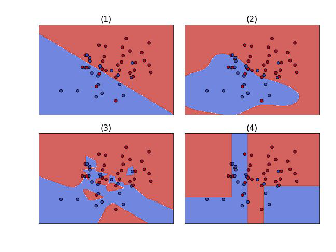

In [12]:
# Which of the following is a linear decision boundary?

# Answer: 1

imagem = plt.imread(data_folder + "linear_nonlinear.JPG")
plt.axis('off')
plt.imshow(imagem)
plt.show()

Exercício 10

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


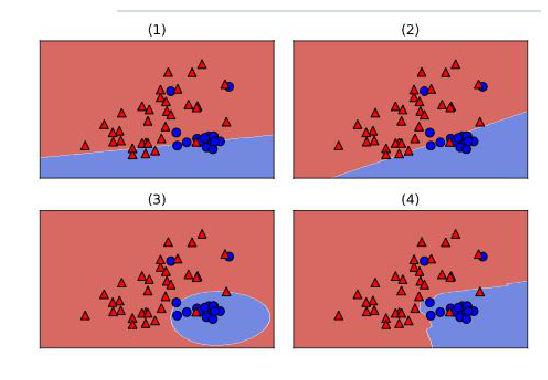

In [56]:
# Visualizing decision boundaries

import sklearn.datasets
wine = sklearn.datasets.load_wine()
X = wine.data
y = wine.target

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000), 
               LinearSVC(max_iter=10000), 
               SVC(gamma='scale', max_iter=10000), 
               KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X, y)
    
# plot_contours(ax, X, y, classifiers) --->  ver ex: https://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
# plt.show()

imagem = plt.imread(data_folder + "logreg_linearSVC_SVC_kNN.JPG")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.8, top=1, wspace=0, hspace=0)
plt.show()

# As you can see, logistic regression and linear SVM are linear classifiers whereas the default SVM and KNN are not.

# CHAPTER 2 - Loss functions

#### Exercício 1 - Linear classifiers: the coefficients

x: [0 1 2]
y: [3 4 5]
[ 0  4 10]
14

x@y is called the dot product of x and y, and is written x ⋅ y  ---> equivalente a np.sum(x*y)
14
these are multiplications in higher dimensions, since x and y are arrays of values
0
1
[10.30824008 -7.55706905 -2.75117103]
[-0.66306131  4.50519642 -3.84213511]


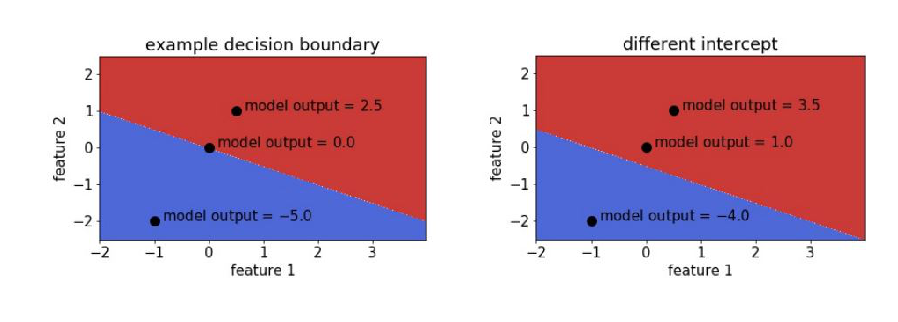

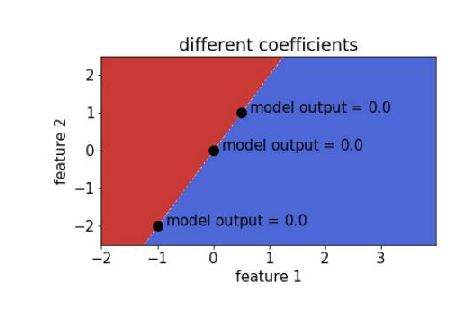

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [14]:
#vídeo

# Dot products
x = np.arange(3)
print("x:", x)

y = np.arange(3,6)
print("y:", y)

print(x*y)
print(np.sum(x*y))

print("\nx@y is called the dot product of x and y, and is written x ⋅ y  ---> equivalente a np.sum(x*y)")
print(x@y)
print("these are multiplications in higher dimensions, since x and y are arrays of values")

# Linear classifier prediction

#  * raw model output = coefficients ⋅ features + intercept
#  * Linear classifier prediction: compute raw model output, check the sign:
#        if positive, predict one class
#        if negative, predict the other class
#  * This is the same for logistic regression and linear SVM
#        fit is different but predict is the same

# sklearn: LogisticRegression and LinearSVM have different 'fit' functions but the same 'predict' function.
# the differences in fit relate to loss functions

print("==============================================================================")

# How LogisticRegression makes predictions

X = wine.data
y = wine.target

# raw model output = coefficients ⋅ features + intercept

lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
lr.fit(X, y)

print(lr.predict(X)[10])
print(lr.predict(X)[120])

print(lr.coef_ @ X[10] + lr.intercept_)    # raw model output
print(lr.coef_ @ X[120] + lr.intercept_)   # raw model output

print("==============================================================================")

# imagens
imagem_1 = plt.imread(data_folder + "raw_model_output_1.jpg")
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(imagem_1)
# plt.show()
imagem_2 = plt.imread(data_folder + "raw_model_output_2.jpg")
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(imagem_2)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.show()
imagem_3 = plt.imread(data_folder + "raw_model_output_3.jpg")
plt.axis('off')
plt.imshow(imagem_3)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

# dados
wine.keys()

Exercício 2

In [15]:
# How models make predictions

# Which classifiers make predictions based on the sign (positive or negative) of the raw model output?

# Logistic regression only
# Linear SVMs only
# Neither
# Both logistic regression and Linear SVMs  (True)

# And, since logistic regression and SVMs are both linear classifiers, the raw model output is a linear function of x.

Exercício 3

In [16]:
# Changing the model coefficients

# When you call fit with scikit-learn, the logistic regression coefficients are automatically learned from your dataset. 
# In this exercise you will explore how the decision boundary is represented by the coefficients.
# To do so, you will change the coefficients manually (instead of with fit), and visualize the resulting classifiers.

X_1 = [[ 1.78862847,  0.43650985],
       [ 0.09649747, -1.8634927 ],
       [-0.2773882 , -0.35475898],
       [-3.08274148,  2.37299932],
       [-3.04381817,  2.52278197],
       [-1.31386475,  0.88462238],
       [-2.11868196,  4.70957306],
       [-2.94996636,  2.59532259],
       [-3.54535995,  1.45352268],
       [ 0.98236743, -1.10106763],
       [-1.18504653, -0.2056499 ],
       [-1.51385164,  3.23671627],
       [-4.02378514,  2.2870068 ],
       [ 0.62524497, -0.16051336],
       [-3.76883635,  2.76996928],
       [ 0.74505627,  1.97611078],
       [-1.24412333, -0.62641691],
       [-0.80376609, -2.41908317],
       [-0.92379202, -1.02387576],
       [ 1.12397796, -0.13191423]]

y_1 = [-1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1]


# Linear classifier
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)

#################################################################################################################

# Set the coefficients to various values and observe the resulting decision boundaries.
# 1)
model.coef_ = np.array([[0,1]])
model.intercept_ = np.array([0])

# # 2)
# model.coef_ = np.array([[3,4]])
# model.intercept_ = np.array([0])



# # Plot the data and decision boundary
# plot_classifier(X_1, y_1, model)

# # Print the number of errors
# num_err = np.sum(y_1 != model.predict(X_1))
# print("Number of errors:", num_err)


the coefficients determine the slope of the boundary and the intercept shifts it

#### Exercício 4 - What is a loss function?

In [17]:
#vídeo

# Linear regression

from scipy.optimize import minimize

minimize(np.square, 0).x
minimize(np.square, 2).x

array([-1.88846401e-08])

Exercício 5

In [18]:
# The 0-1 loss

# In the figure below, what is the 0-1 loss (number of classification errors) of the classifier?
# Answer: 2

Exercício 6

In [19]:
# Minimizing a loss function

from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

boston = pd.read_csv(data_folder + "boston.csv")
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

###################################################################

# example with no intercept term

# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)
print("============================================================")

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

[-9.28967286e-02  4.87153060e-02 -4.05715986e-03  2.85398885e+00
 -2.86831908e+00  5.92815052e+00 -7.26945050e-03 -9.68512387e-01
  1.71156442e-01 -9.39665803e-03 -3.92187377e-01  1.49054675e-02
 -4.16304464e-01]
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01]


#### Exercício 7 - Loss function diagrams

In [20]:
#vídeo

# The raw model output

# Linear regression loss diagram
# Logistic regression loss diagram
# Hinge loss diagram --> used in SVM


Exercício 8

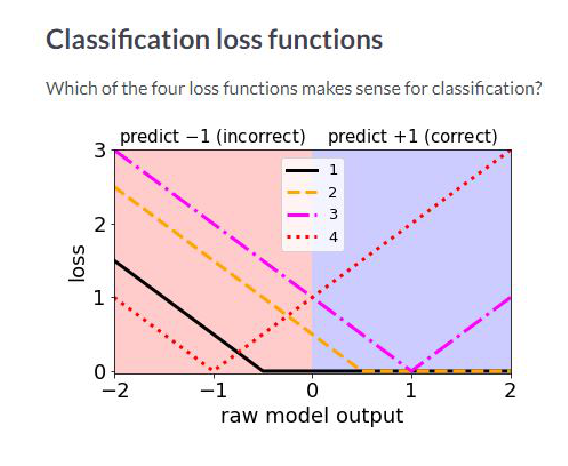

In [21]:
# Answer: 2

imagem = plt.imread(data_folder + "classification_loss_functions.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.5, right=1.5, top=1, wspace=0, hspace=0)
plt.show()

Exercício 9

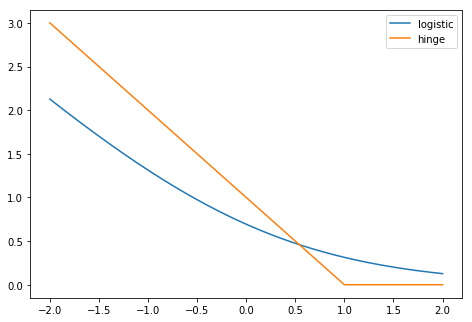

In [22]:
# Comparing the logistic and hinge losses

# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
    return np.log(1 + np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
    return np.maximum(0, 1 - raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)

plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 10

In [23]:
# Implementing logistic regression

# ver X_1 e y_1 definidos atrás

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(0, len(y_1)):
        raw_model_output = w@X_1[i]
        s = s + log_loss(raw_model_output * y_1[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X_1[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000, solver='lbfgs').fit(X_1 ,y_1)
print(lr.coef_)


[-0.41509489  0.88447546]
[[-0.41509756  0.88448004]]


# Chapter 3 - Logistic regression


#### Exercício 1 - Logistic regression and regularization

In [24]:
#vídeo

# how does regularization affect training accuracy?
# how does regularization affect test accuracy?

# L1 vs L2 regularization

Exercício 2

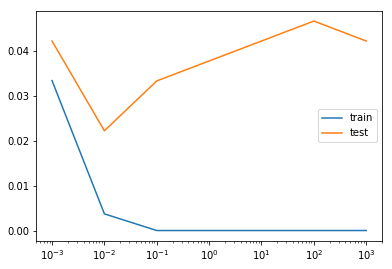

In [25]:
# Regularized logistic regression

from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)


# Train and validaton errors initialized as empty list
train_errors = list()
test_errors = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C
for c in C_values:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=c, solver='lbfgs', multi_class='auto', max_iter=10000)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append( 1.0 - lr.score(X_train, y_train) )
    test_errors.append( 1.0 - lr.score(X_test, y_test) )
    
# Plot results
plt.semilogx(C_values, train_errors, C_values, test_errors)
plt.legend(("train", "test"))

plt.subplots_adjust(left=0, bottom=0.2, right=0.8, top=1, wspace=0, hspace=0)
plt.show()


# As you can see, too much regularization (small C) doesn't work well - due to underfitting 
# and too little regularization (large C) doesn't work well either - due to overfitting

Exercício 3

In [26]:
# Logistic regression and feature selection (movie review sentiment data - vou usar outro)

# We'll search for the best value of C using scikit-learn's GridSearchCV()
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

#######################################################################################################

# Specify L1 regularization
lr = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto', max_iter=10000)

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]}, cv=5)   
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))


Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 250


Exercício 4

In [27]:
%%script false
# Identifying the most positive and negative words

# In this exercise we'll try to interpret the coefficients of a logistic regression fit on the movie review sentiment dset. 
# For example, since vocab[100] is "think", that means feature 100 corresponds to the number of times the word "think"
# appeared in that movie review.

lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
vocab = ['the', 'a', 'dream', 'and', 'birth', 'sorts', 'gritty', 'miguel', 'ahah', 'exemplo'] # ...

# Find the words corresponding to the 5 largest coefficients.
# Find the words corresponding to the 5 smallest coefficients.

# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")

print("\n")

Couldn't find program: 'false'


#### Exercício 5 - Logistic regression and probabilities

In [28]:
#vídeo

Exercício 6

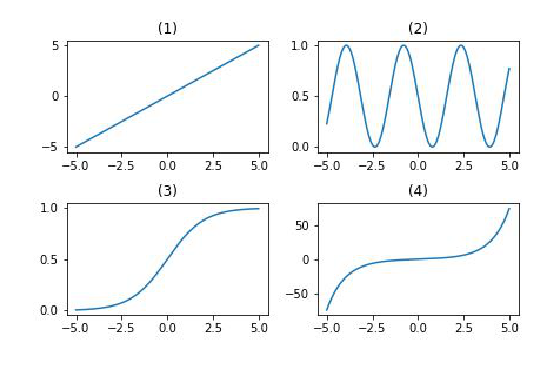

In [29]:
# Getting class probabilities

# Which of the following transformations would make sense for transforming the raw model output of a linear classifier
# into a class probability?

imagem = plt.imread(data_folder + "class_probabilities.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.2, right=1.2, top=1, wspace=0, hspace=0)
plt.show()


# Answer: 3

Exercício 7

In [30]:
# Regularization and probabilities

# 2D binary classification dataset que vimos antes
X_1
y_1

# 1)
# Compute the maximum predicted probability.
# Run the provided code and take a look at the plot.    ---> n temos a fórmula

# Set the regularization strength
model = LogisticRegression(C=1, solver='lbfgs', multi_class='auto', max_iter=10000)

# Fit and plot
model.fit(X_1, y_1)
# plot_classifier(X_1,y_1,model, proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X_1)
print("Maximum predicted probability", np.max(prob))

# 2)
# Create a model with C=0.1 and examine how the plot and probabilities change.

model = LogisticRegression(C=0.1, solver='lbfgs', multi_class='auto', max_iter=10000)
model.fit(X_1, y_1)
prob = model.predict_proba(X_1)
print("Maximum predicted probability", np.max(prob))


# smaller values of C lead to less confident predictions. That's because smaller C means more regularization,
# which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities 
# closer to 0.5 after the raw model output is squashed through the sigmoid function.

Maximum predicted probability 0.9973143426717812
Maximum predicted probability 0.9352061679007129


Exercício 8

In [31]:
%%script false
# Visualizing easy and difficult examples

from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
########################################################################

# The show_digit function takes in an integer index and plots the corresponding image, with some extra information 
# displayed above the image.

lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

# mostrava um dígito 0 com probabilidade 1, e um 4 com probabilidade 0.39

Couldn't find program: 'false'


#### Exercício 9 - Multi-class logistic regression

In [32]:
#vídeo
X = digits.data
y = digits.target

# Combining binary classifiers with one-vs-rest  (faz usar 2 apenas)

# lr0.fit(X, y==0)    # returns an array, size equal to y, that is true when y=0 and false otherwise  (0 vs not-0)
# lr1.fit(X, y==1)    # (1 vs not-1)
# lr2.fit(X, y==2)    # (2 vs not-2)                                  # this is called one-vs-rest 


# lr0.decision_function(X)[0]   6.124    # .decision_function() is the same as getting the raw model output
# lr1.decision_function(X)[0]  -5.429
# lr2.decision_function(X)[0]  -7.532

# it means it's more confident the class is 0 then any other classes

# lr.fit(X, y)
# lr.predict(X)[0]  ---> 0, as expected

###########################################################################################

# Another way to achieve multi-class classification with logistic regression is to modify the loss function
# so that directly tries to optimize accuracy on the multi-class problem
# ---> several names for this: "multinomial logistic regression" ; "softmax" ; "cross-entropy loss"


# One-vs-rest vs. ----> multinomial/softmax

# fit a binary classifier for each class
# ---->  fit a single classifier for all classes

# predict with all, take largest output
# ---->  prediction directly outputs best class

# pro: simple, modular  |  con: not directly optimizing accuracy
# ---->  pro: tackle the problem directly  |  con: more complicated, new code

# common for SVMs as well
# ---->  possible for SVMs, but less common

#################

# Model coefficients for multi-class

lr_ovr = LogisticRegression(solver="lbfgs", multi_class='auto', max_iter=10000)    # one-vs-rest by default
lr_ovr.fit(X, y)
        # lr_ovr.coef_.shape ---> (3, 13)
        # lr_ovr.intercept_.shape ---> (3, )

lr_mn = LogisticRegression(multi_class="multinomial", solver="lbfgs")#need to specify this solver(the default is for binary)
lr_mn.fit(X, y)
        # lr_mn.coef_.shape ---> (3, 13)
        # lr_mn.intercept_.shape ---> (3, )


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Exercício 10

In [33]:
# Counting the coefficients

# If you fit a logistic regression model on a classification problem with 3 classes and 100 features, how many coefficients
# would you have, including intercepts?

# Answer: 303

Exercício 11

In [34]:
# Fitting multi-class logistic regression

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
lr_ovr.fit(X_train, y_train)

print("Fit one-vs-rest logistic regression classifier")
print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class="multinomial", solver='lbfgs', max_iter=10000)
lr_mn.fit(X_train, y_train)

print("\nFit softmax classifier")
print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))


# As you can see, the accuracies of the two methods are fairly similar on this data set.

Fit one-vs-rest logistic regression classifier
OVR training accuracy: 1.0
OVR test accuracy    : 0.9666666666666667

Fit softmax classifier
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9666666666666667


Exercício 12

In [35]:
%%script false
# Visualizing multi-class logistic regression

# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression(C=100)
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

Couldn't find program: 'false'


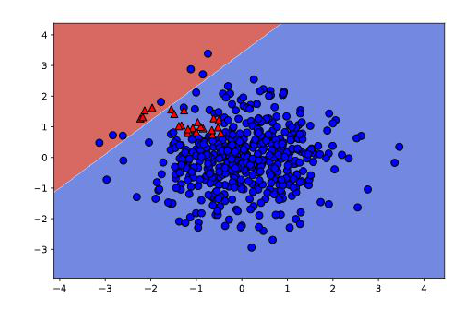

In [36]:
imagem = plt.imread(data_folder + "lr_class_1.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()


#  As you can see, the binary classifier incorrectly labels almost all points in class 1 (shown as red triangles in 
# the final plot)! Thus, this classifier is not a very effective component of the one-vs-rest classifier. 
# In general, though, one-vs-rest often works well.

Exercício 13

In [37]:
%%script false
# One-vs-rest SVM

# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train, y_train==1, svm_class_1)

Couldn't find program: 'false'


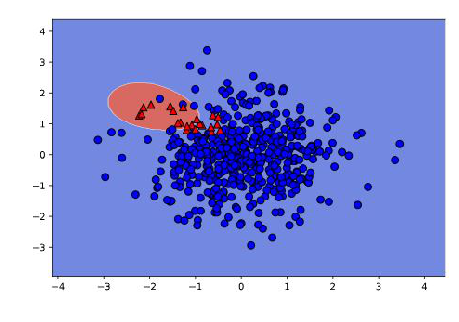

In [38]:
imagem = plt.imread(data_folder + "svm_class_1.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()


# The non-linear SVM works fine with one-vs-rest on this dataset because it learns to "surround" class 1.

# Chapter 4 - Support Vector Machines

#### Exercício 1 - Support vectors

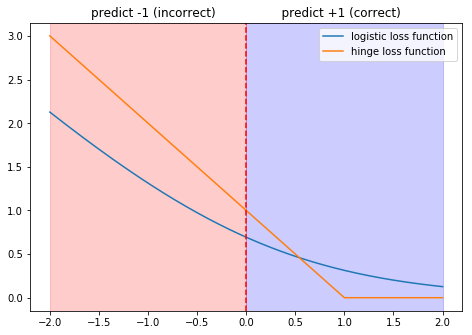

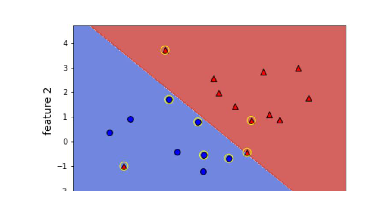

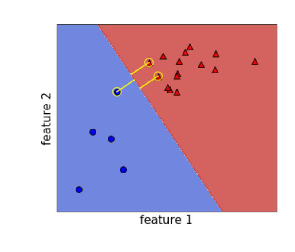

In [39]:
# vídeo

# What is an SVM?

# Linear classifiers (so far)
# Trained using the hinge loss and L2 regularization   (ver gráfico atrás)

##############################################################################
# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
    return np.log(1 + np.exp(-raw_model_output))

def hinge_loss(raw_model_output):
    return np.maximum(0, 1 - raw_model_output)

# grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic loss function')
plt.plot(grid, hinge_loss(grid), label='hinge loss function')
plt.legend()
plt.axvline(x=0, color='red', linestyle='--')
plt.axvspan(0, 2, color='blue', alpha=0.2)
plt.axvspan(-2, 0, color='red', alpha=0.2)
plt.title("predict -1 (incorrect)                 predict +1 (correct)")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()
##############################################################################

# What are support vectors ?

# Support vector: a training example not in the flat part of the loss diagram
# or --> Support vector: an example that is incorrectly classified or close to the boundary
# If an example is not a support vector, removing it has no effect on the model

# even though we use the name 'support vectors', it's really the non support vectors that are remarkable.
# comparing with logistic regression, there is no flat part of the loss there, and therefore all data points mather to 
# the fit.
# Having a small number of support vectors makes kernel SVMs really fast
# (part of the speed comes from clever algorithms whose running time only scales with the number of support vectors rather
#  than the total number of training examples)

imagem = plt.imread(data_folder + "support_vectors.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.show()
#################################################

# altough it's not the perspective in this course, you may encounter the idea that SVM's "maximize the margin"

# Max-margin viewpoint
# The SVM maximizes the "margin" for linearly separable datasets
# Margin: distance from the boundary to the closest points

imagem = plt.imread(data_folder + "max_margin_viewpoint.jpg")
plt.axis('off')
plt.imshow(imagem)
# plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

Exercício 2

In [40]:
# Support vector definition

# Which of the following is a true statement about support vectors?

# 1) All support vectors are classified correctly. (false)
# 2) All support vectors are classified incorrectly. (false)
# 3) All correctly classified points are support vectors. (false)
# 4) All incorrectly classified points are support vectors. (TRUE)

Exercício 3

In [41]:
%%script false
# Effect of removing examples

# Support vectors are defined as training examples that influence the decision boundary.
# In this exercise, you'll observe this behavior by removing non support vectors from the training set.

# Note: we specify 'lims' in plot_classifier() so that the two plots are forced to use the same axis limits 
# and can be compared directly.)

wine = sklearn.datasets.load_wine()
X = wine.data[:, 0:2]   # first 2 features only
y = wine.target
########################################################################

# Train a linear SVM
svm = SVC(kernel="linear")   # default=’rbf’
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))


Couldn't find program: 'false'


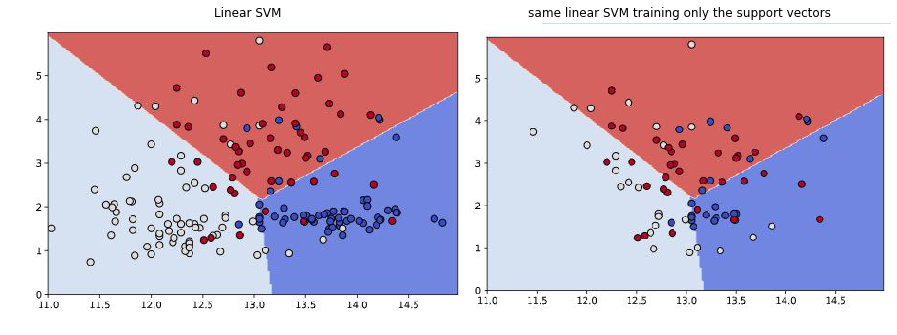

In [42]:
# train a linear SVM plot
imgem_linear_SVM = plt.imread(data_folder + "imgem_linear_SVM.jpg")
plt.subplot(1, 2, 1)
plt.title("Linear SVM")
plt.axis('off')
plt.imshow(imgem_linear_SVM)

# new SVM training only the support vectors
imagem_support_vectors_SVM = plt.imread(data_folder + "imagem_support_vectors_SVM.jpg")
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("same linear SVM training only the support vectors")
plt.imshow(imagem_support_vectors_SVM)
plt.subplots_adjust(left=0, bottom=0, right=2, top=1, wspace=0, hspace=0)
plt.show()

# Compare the decision boundaries of the two trained models: are they the same? By the definition of support vectors,
# they should be!

#### Exercício 4 - Kernel SVMs

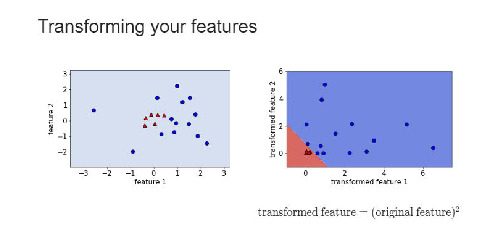

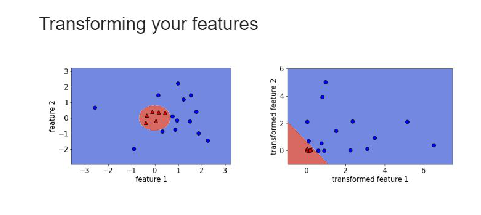

In [43]:
#vídeo

# How to fit non-linear boundaries using linear classifiers

# Transforming your features
imagem = plt.imread(data_folder + "transforming_features_linear.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()
# transformed feature = (original feature)^2 ---> trazendo de volta ao espaço, fica uma elipse
imagem = plt.imread(data_folder + "non_linear_to_linear.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()
# Fitting a linear model in a transformed space corresponds to fit a non-linear model in the original space

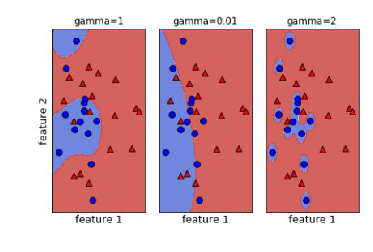

In [44]:
# in general, the transformation isn't always going to be squared and the boundary isn't always going to be an elipse
# in fact, the new space often has a different number of dimensions from the original space.. mas esta é a ideia básica

# Kernel SVM implement feature transformations in a computationally efficient way

from sklearn.svm import SVC

svm = SVC(gamma=1)    # default is kernel="rbf" - 'radial basis function' Kernel ---> vamos ver este

imagem = plt.imread(data_folder + "gamma_one.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.show()

# we can control the shape of the boundary using the hyperparameters
# we have the 'C' hyperparameter that controls regularization
# we also have 'gamma' --> controls the smoothness of the boundary
#      by decreasing gamma we make the boundary smoother
#      increasing the RBF kernel hyperparameter gamma increases training accuracy

# why not always use the largest value for gamma? Overfitting

Exercício 5

In [45]:
# GridSearchCV warm-up

X = digits.data
y = digits.target

# binary version of the handwritten digits dataset, in which you're just trying to predict whether or not an image is "2" 
y_2 = [True if i == 2 else False for i in y]


# Instantiate an RBF SVM
svm = SVC()  # C=1 by default

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}

searcher = GridSearchCV(svm, param_grid=parameters, cv=5)   

searcher.fit(X, y_2)

# Report the best parameters
print("Best CV params", searcher.best_params_)


Best CV params {'gamma': 0.001}


Exercício 6

In [46]:
# Jointly tuning gamma and C with GridSearchCV

from sklearn.model_selection import train_test_split

# Even though cross-validation already splits the training set into parts, it's often a good idea to hold out a separate
# test set to make sure the cross-validation results are sensible.
X_train, X_test, y_train, y_test = train_test_split(X, y_2)

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}

searcher = GridSearchCV(svm, param_grid=parameters, cv=5)

searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV parameters", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hyperparameters:", searcher.score(X_test, y_test))


# Note that the best value of gamma, 0.0001, is different from the value of 0.001 that we got in the previous exercise,
# when we fixed C=1. Hyperparameters can affect each other

Best CV parameters {'C': 10, 'gamma': 0.0001}
Best CV accuracy 1.0
Test accuracy of best grid search hyperparameters: 1.0


#### Exercício 7 - Comparing logistic regression and SVM (and beyond)

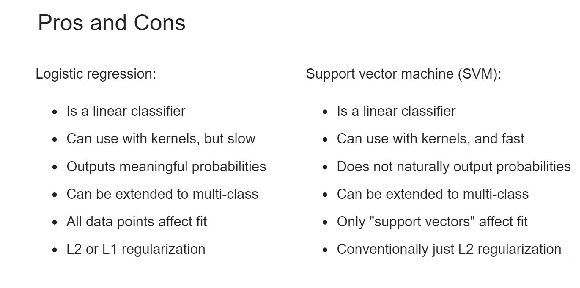

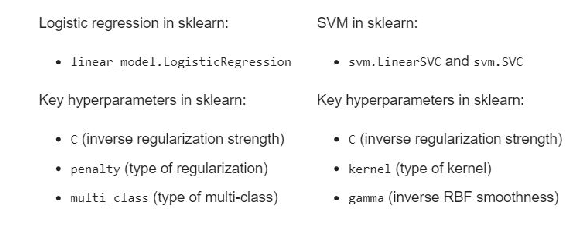

In [47]:
#vídeo

# Pros and Cons
imagem = plt.imread(data_folder + "logreg_vs_svm.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.25, right=1.25, top=1, wspace=0, hspace=0)
plt.show()


# Use in scikit-learn

# Logistic regression in sklearn:
from sklearn.linear_model import LogisticRegression
# Key hyperparameters:
# 'C' (inverse regularization strength)
# 'penalty' (type of regularization: 'l1' ; 'l2' )
# 'multi_class' (type of multi-class)  --> este afeta menos os resultados; {‘ovr’, ‘multinomial’, ‘auto’}, default: ‘ovr’


# há mais hyperparameters, mas estes são os fundamentais
# solver : str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’.

imagem = plt.imread(data_folder + "logreg_vs_svm_in_sklearn.jpg")
plt.axis('off')
plt.imshow(imagem)
plt.subplots_adjust(left=0, bottom=-0.25, right=1.25, top=1, wspace=0, hspace=0)
plt.show()

# Support vector machine (SVM) in sklearn:
from sklearn.svm import LinearSVC, SVC   # escolher LinearSCV em vez  de SVC e depois especificar fica mais rápido
# Key hyperparameters:
# 'C' (inverse regularization strength)
# 'kernel' (vimos ‘linear’, ‘rbf’, mas há outros: 'poly’, ‘sigmoid’, ‘precomputed’ or a callable)
# 'gamma' (controls the smoothness)

######################################################################################

# SGD Classifier --> stochastic gradient descent. Não vimos este mas é importante tb
# SGDClassifier: scales well to large datasets
from sklearn.linear_model import SGDClassifier

logreg = SGDClassifier(loss='log')
linsvm = SGDClassifier(loss='hinge')

# como antes, é tugo igual excepto a 'loss function'

# SGDClassifier hyperparameter alpha is like 1/C  ---> bigger alpha means more regularization

Exercício 8

In [48]:
# An advantage of SVMs

# Which of the following is an advantage of SVMs over logistic regression?

# 1) They naturally outputs meaningful probabilities.
# 2) They can be used with kernels.
# 3) They are computationally efficient with kernels. (TRUE)
# 4) They learn sigmoidal decision boundaries.

Exercício 9

In [49]:
# An advantage of Logistic Regression

# Which of the following is an advantage of logistic regression over SVM?

# 1) They naturally outputs meaningful probabilities. (TRUE)
# 2) They can be used with kernels.
# 3) They are computationally efficient with kernels. 
# 4) They learn sigmoidal decision boundaries.

Exercício 10

In [50]:
# Using SGDClassifier

from sklearn.linear_model import SGDClassifier


# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 
              'penalty':['l1', 'l2']}

searcher = GridSearchCV(linear_classifier, param_grid=parameters, cv=5)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))


#  One advantage of SGDClassifier is that it's very fast - 
# this would have taken a lot longer with LogisticRegression or LinearSVC.

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

Best CV params {'alpha': 0.01, 'loss': 'log', 'penalty': 'l2'}
Best CV accuracy 0.9985152190051967
Test accuracy of best grid search hypers: 0.9977777777777778


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

#### Exercício 11 - Conclusion

In [51]:
#vídeo

# Fim